In [843]:
# Functions needed for the pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import graphviz # If you don't have this, install via pip/conda
%matplotlib inline
import pylab as pl


### 1 READ THE DATA

In [844]:
def create_df (file):
    '''Creates a pandas data frame using as input 
    a .csv file
    Inputs:
    file (string): Path to file
    '''
    return pd.read_csv(file)


In [845]:
data = create_df('credit-data.csv')

In [846]:
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


### 2 EXPLORE THE DATA

In [847]:
def plot_hist(df, variable, num_bins):
    '''
    Creates a histogram plot using a dataframe df for
    a variable of interest
    
    Inputs:
        df-> Dataframe
        variable -> variable of interest
        num_bins -> number of bins
    '''
    
    plt.hist(df[variable].dropna(), bins=num_bins)
    plt.title('Distribution of'+ ' '+  variable)
    plt.ylabel(variable)
    plt.xlabel('Frequency')
    plt.show()

In [848]:
def scatterplot(df, var_y,var_x):
    '''
    Creates a scatterplot using a dataframe df,
    and the features var_y and var_x
    Inputs:
    df-> Dataframe
    var_y (string)-> y variable
    var_x (string) -> x variable
    '''
    plt.scatter(df[var_y], df[var_x])
    plt.title(var_y +' '+ 'vs'+ ' '+ var_x)
    plt.xlabel(var_x) 
    plt.ylabel(var_y)
    plt.show()

In [849]:
def corr_pair(df, variable):
    '''
    Creates a dataframe with the correlation values of
    the variable and the rest of the variables in a dataframe
    
    Inputs:
    df-> dataframe
    variable: the variable of interest which the correlation coefficients
    are calculated with
    
    Returns: 
    Dataframe
    '''
    dic = {}
    for element in list(set(list(df)) - set(list(variable))):
        dic[element] = df[variable].corr(data[element])
    a = pd.DataFrame(list(dic.items()), columns=['variable', variable])
    a.set_index('variable', inplace= True)
    return a

In [850]:
def count_nulls(df):
    '''
    Counts the number of missing values per variable in a dataframe
    Returns: Dataframe
    '''
    dic = {}
    for element in list(df):
        dic[element] = sum(pd.isnull(data[element]))
    a = pd.DataFrame(list(dic.items()), columns=['variable', 'Missings'])
    a.set_index('variable', inplace= True)
    return a

In [851]:
data['SeriousDlqin2yrs'].describe().round(2)

count    41016.00
mean         0.16
std          0.37
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: SeriousDlqin2yrs, dtype: float64

In [852]:
data.describe().round(2)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.00,41016.00,41016.00,41016.00,41016.00,41016.00,41016.00,33042.00,41016.00,41016.00,41016.00,41016.00,39979.00
mean,115800.15,0.16,6.38,51.68,60623.82,0.59,331.46,6579.00,8.40,0.42,1.01,0.37,0.77
std,28112.72,0.37,221.62,14.75,11.98,5.21,1296.11,13446.83,5.21,5.19,1.15,5.17,1.12
min,22.00,0.00,0.00,21.00,60601.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,106539.75,0.00,0.03,41.00,60618.00,0.00,0.18,3333.00,5.00,0.00,0.00,0.00,0.00
50%,119901.50,0.00,0.19,51.00,60625.00,0.00,0.37,5250.00,8.00,0.00,1.00,0.00,0.00
75%,134698.25,0.00,0.67,62.00,60629.00,0.00,0.87,8055.75,11.00,0.00,2.00,0.00,1.00
max,149999.00,1.00,22000.00,109.00,60644.00,98.00,106885.00,1794060.00,56.00,98.00,32.00,98.00,13.00


In [853]:
corr_pair(data,'SeriousDlqin2yrs')


,SeriousDlqin2yrs
variable,
NumberOfTime60-89DaysPastDueNotWorse,0.121886
zipcode,-0.045051
MonthlyIncome,-0.032810
NumberRealEstateLoansOrLines,-0.010641
DebtRatio,-0.013502
age,-0.173728
RevolvingUtilizationOfUnsecuredLines,-0.004586
NumberOfTime30-59DaysPastDueNotWorse,0.149334
NumberOfTimes90DaysLate,0.139609


In [854]:
count_nulls(data)

,Missings
variable,
PersonID,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
zipcode,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,7974
NumberOfOpenCreditLinesAndLoans,0


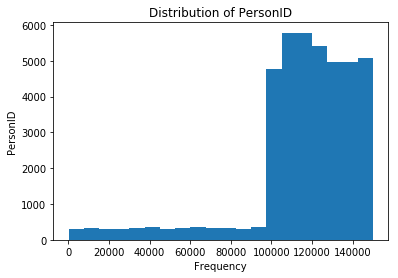

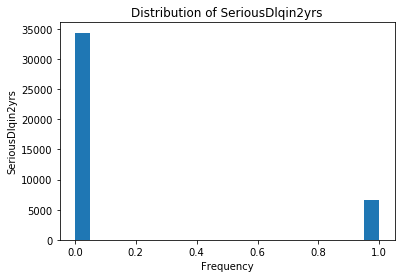

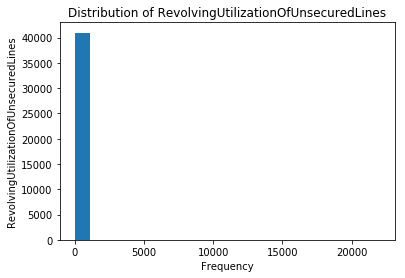

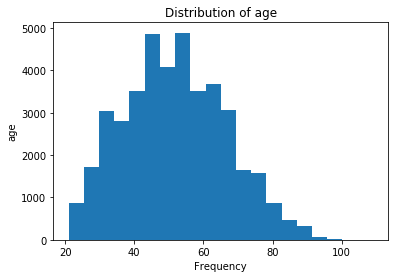

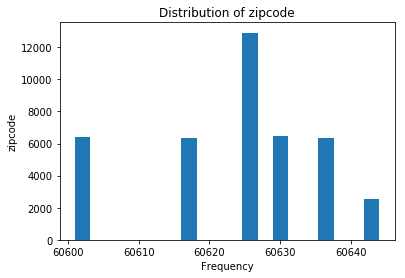

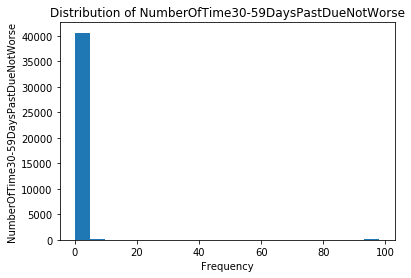

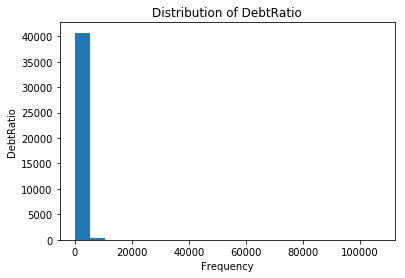

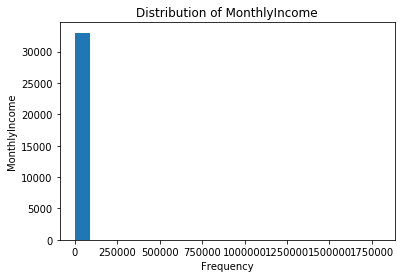

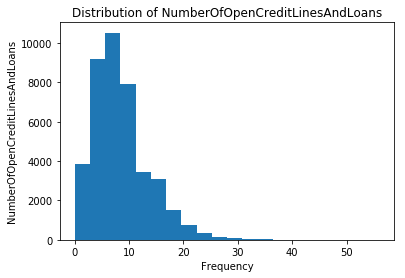

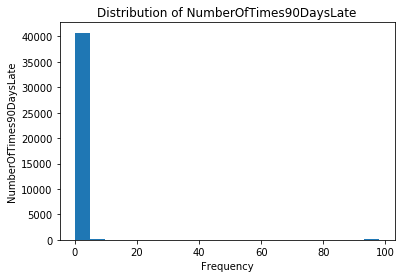

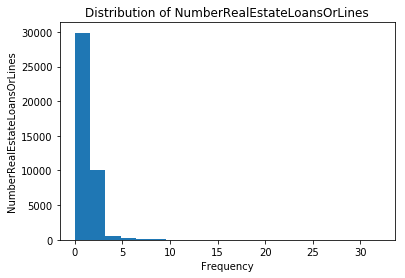

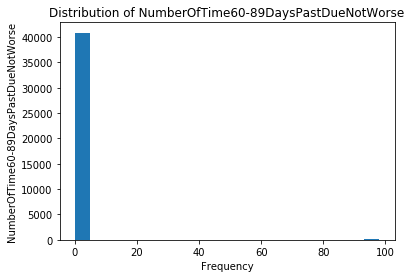

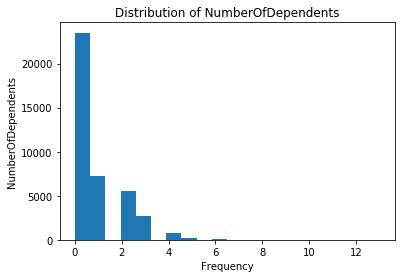

In [855]:
for element in list(data):
    plot_hist(data, element, 20)

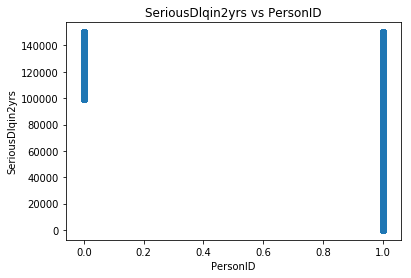

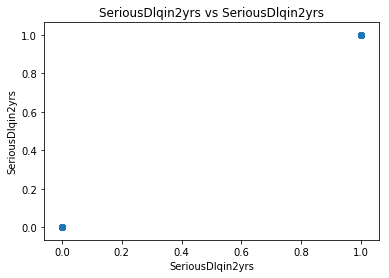

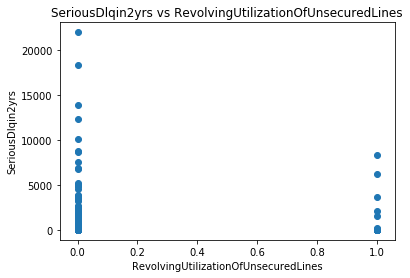

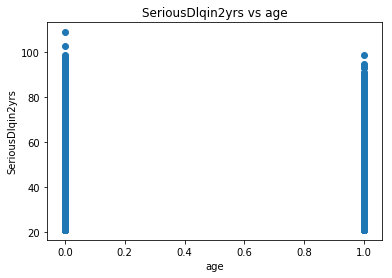

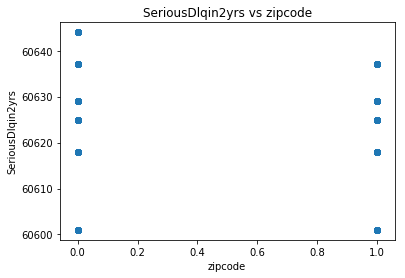

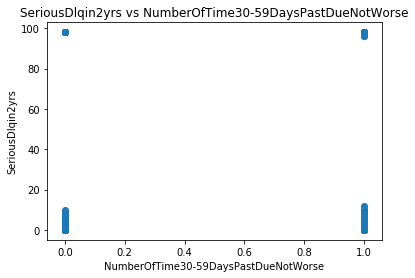

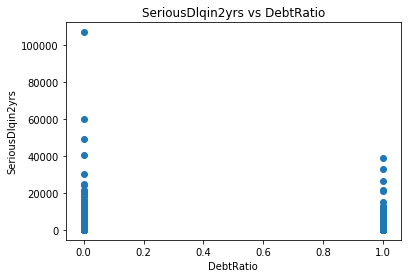

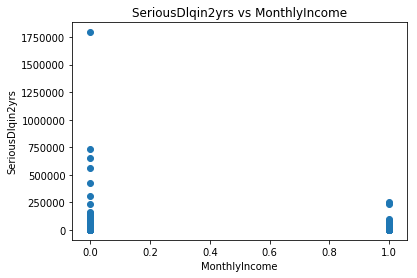

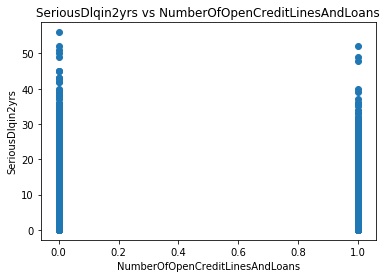

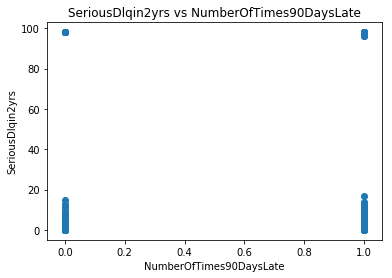

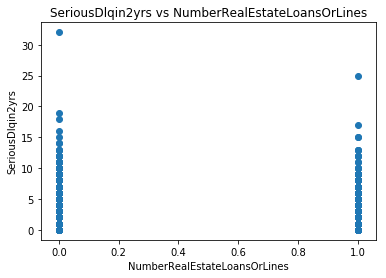

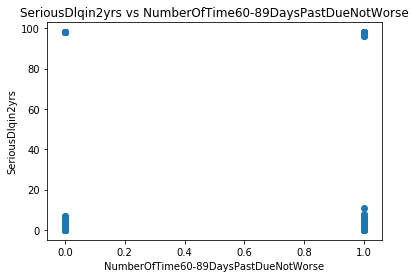

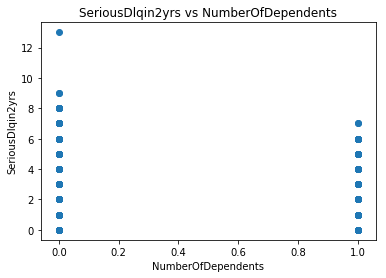

In [856]:
for variable in list(data):
    scatterplot(data, 'SeriousDlqin2yrs',variable)

### 3 PRE-PROCESS DATA

To impute values (taken from  https://github.com/yhat/DataGotham2013/)

In [857]:
def generate_train_and_test(df, variables, var_to_predict, test_size, random_state):
    '''Creates a train and test dataframes, both for features and labels
    Inputs:
        Dataframe: Original Data
        Variables: list of features
        var_to_predict: labels
        test_size: fraction of the data assigned to test
        random_state: random seed
    Returns:
        Tuple with x_train, x_test, y_train, y_test
    '''
    X = df.filter(items = variables)
    Y = df[var_to_predict]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)
    return x_train, x_test, y_train, y_test

In [858]:
# See nulls 
nans = lambda df: df[df.isnull().any(axis=1)]

In [859]:
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [860]:
list(data)

['PersonID',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [861]:
X =['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']
#Y = data['SeriousDlqin2yrs']

In [862]:
# We create train and tests datasets
datasets = generate_train_and_test(data, X, 'SeriousDlqin2yrs', .4, 2329)
x_train = datasets [0]
x_test= datasets[1]
y_train= datasets[2] 
y_test = datasets[3]

#### I will use the mean impute method

In [863]:
def impute(df, variable, statistic):
    '''Imputes values to a specified variable
    Inputs:
        df: dataframe
        variable: variable which will be imputed
        statistic: valid values: mean, median or zero
    Returns:
        dataframe without nulls
    '''
    if statistic == 'mean':
        df[variable].fillna(df[variable].mean(), inplace=True)
    elif statistic == 'median':
        df[variable].fillna(df[variable].median(), inplace=True)  
    elif statistic == 0:
        df[variable] = np.where(df[variable].isnull(), statistic,
                                  df[variable])
    
    

In [864]:
feat= [x_train, x_test]
for x_set in feat:
    impute(x_set,'MonthlyIncome','mean')
    impute(x_set, 'NumberOfDependents', 'mean')
    

In [865]:
nans(x_test)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


## 4. Generating Features

GenerateFeatures/Predictors:Forthisassignment,youshouldwriteonefunction that can discretize a continuous variable and one function that can take a categorical variable and create binary/dummy variables from it. Apply them to at least one variable each in this data.

In [866]:
(y_train== 1).sum()

4024

In [867]:
data['income_bins'] = pd.cut(data.MonthlyIncome, bins=15)
pd.value_counts(data['income_bins'])

(-1794.06, 119604.0]      33028
(119604.0, 239208.0]          7
(239208.0, 358812.0]          2
(1674456.0, 1794060.0]        1
(717624.0, 837228.0]          1
(598020.0, 717624.0]          1
(478416.0, 598020.0]          1
(358812.0, 478416.0]          1
(1554852.0, 1674456.0]        0
(1435248.0, 1554852.0]        0
(1315644.0, 1435248.0]        0
(1196040.0, 1315644.0]        0
(1076436.0, 1196040.0]        0
(956832.0, 1076436.0]         0
(837228.0, 956832.0]          0
Name: income_bins, dtype: int64

In [911]:
def cap_values(x, cap):
    ''' 
    if a value exceeds the threshold cap, it returns
    the value cap, otherwise the same value'''
    
    if x > cap:
        return cap
    else:
        return x

In [869]:
data.MonthlyIncome = data.MonthlyIncome.apply(lambda x: cap_values(x, 15000))
data.MonthlyIncome.describe()

count    33042.000000
mean      6045.789026
std       3663.717398
min          0.000000
25%       3333.000000
50%       5250.000000
75%       8055.750000
max      15000.000000
Name: MonthlyIncome, dtype: float64

In [870]:
data['income_bins'] = pd.cut(data.MonthlyIncome, bins=15)
pd.value_counts(data['income_bins'])

(4000.0, 5000.0]      4300
(3000.0, 4000.0]      4299
(2000.0, 3000.0]      3741
(5000.0, 6000.0]      3630
(6000.0, 7000.0]      2913
(7000.0, 8000.0]      2439
(1000.0, 2000.0]      2165
(8000.0, 9000.0]      1909
(14000.0, 15000.0]    1788
(9000.0, 10000.0]     1615
(-15.0, 1000.0]       1229
(10000.0, 11000.0]    1175
(11000.0, 12000.0]     791
(12000.0, 13000.0]     649
(13000.0, 14000.0]     399
Name: income_bins, dtype: int64

In [871]:
data[["income_bins", "SeriousDlqin2yrs"]].groupby("income_bins").mean()


,SeriousDlqin2yrs
income_bins,
"(-15.0, 1000.0]",0.137510
"(1000.0, 2000.0]",0.237413
"(2000.0, 3000.0]",0.225074
"(3000.0, 4000.0]",0.204699
"(4000.0, 5000.0]",0.183721
"(5000.0, 6000.0]",0.165565
"(6000.0, 7000.0]",0.148987
"(7000.0, 8000.0]",0.138991
"(8000.0, 9000.0]",0.130959


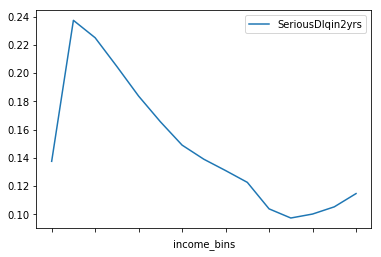

In [872]:
cols = ["income_bins", "SeriousDlqin2yrs"]
data[cols].groupby("income_bins").mean().plot()

In [873]:
data['age'].describe()

count    41016.000000
mean        51.683489
std         14.746880
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        109.000000
Name: age, dtype: float64

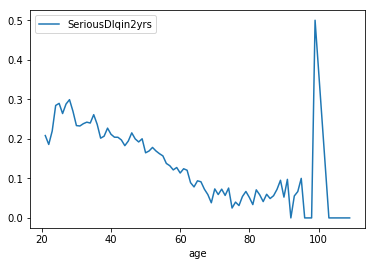

In [874]:
cols = ['age', 'SeriousDlqin2yrs']
age_means = data[cols].groupby("age").mean()
age_means.plot()

In [875]:
#data["age_bucket"] = pd.cut(df.age, range(-1, 110, 10))
age_buckets = [-1, 25] + list(range(30, 80, 5)) + [80, 120]
for x_set in feat:
    x_set["age_bucket"] = pd.cut(x_set.age, age_buckets) 
pd.crosstab(x_test.age_bucket, data.SeriousDlqin2yrs)

SeriousDlqin2yrs,0,1
age_bucket,,
"(-1, 25]",272,80
"(25, 30]",682,231
"(30, 35]",891,292
"(35, 40]",1216,320
"(40, 45]",1537,365
"(45, 50]",1673,395
"(50, 55]",1571,324
"(55, 60]",1595,245
"(60, 65]",1551,167


In [876]:
def cut_buckets(df, variable, buckets):
    '''
    Creates a df which with the variable cut into buckets
    Inputs:
        df-> Dataframe where the new variable is added
        variable -> variable to be cut into bukets
        buckets-> List of values in which the variable will be cut into
    Returns:
        dataframe
    '''
    #new_var = variable+'_'+'bucket'
    df = pd.cut(df[variable], buckets, labels = (list(range(len(buckets))))[1:])
    return df 

In [877]:
for x_set in feat:
    x_set['age_bucket']= cut_buckets(x_set, 'age', age_buckets)

In [878]:
x_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bucket
39054,0.296726,53,0,0.352313,10484.0,8,0,2,0,2.0,7
21298,0.000000,26,0,0.279305,1782.0,5,0,0,0,0.0,2
12839,0.855088,62,0,0.580120,3500.0,4,0,1,0,1.0,9
32002,0.072021,65,1,0.312028,17600.0,16,0,3,0,0.0,9
36228,0.156948,55,0,0.262015,2163.0,5,0,0,0,0.0,7


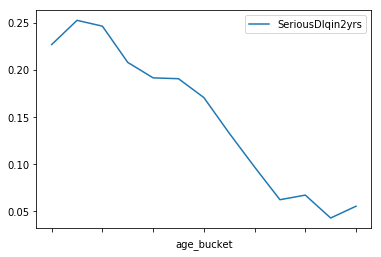

In [879]:
data['age_bucket']= cut_buckets(x_set, 'age', age_buckets)
data[["age_bucket", "SeriousDlqin2yrs"]].groupby("age_bucket").mean().plot()

In [880]:
def cut_in_pct_bins(df, variable, quantiles):
    '''
    Creates bins for the variable and dataframe specified
    Inputs:
    df -> Data Frame
    variable (String)-> Variable of interest
    quantiles (list) -> List of cutoffs for quantiles
    '''
    bins = []
    for q in quantiles:
        bins.append(df[variable].quantile(q))
    labels = []
    for element in (list(range(len(quantiles))))[1:]:
        label = element
        labels.append(label)
        
    return pd.cut(df[variable], bins=bins, include_lowest = True, labels = labels)


In [881]:
def create_dummy(df, variable, threshold, relation):
    ''' 
    Creates a series dataframe with dummy variables equals to one
    if the variable is equal, less or greater than a threshold.
    Inputs:
    df: dataframe
    variable (string): variable to create the dummy variable
    threshold (int): value that makes the relation true in order to create the dummy
    relation (string): can take three values: 'greater', 'equal', or 'less'.
    '''   
    if relation == 'greater':
        return df[variable].apply(lambda x: 1 if x > threshold else 0)
    elif relation == 'equal':
        return df[variable].apply(lambda x: 1 if x == threshold else 0)
    elif relation == 'less':
        return df[variable].apply(lambda x: 1 if x < threshold else 0)

In [882]:
def cap_outliers(x):
    '''
    Assigns the median value of an upward outlier
    Inputs: Dataframe
    Returns: Dataframe
    
    i.e. data['DebtRatio_wo_ol'] = cap_outliers(data['DebtRatio'])
    '''
    mask = (x >= x.quantile(.95))
    x[mask] = x.median()
    return x

In [883]:
for x_set in feat:
    x_set['MonthlyIncome'] = cap_outliers(x_set['MonthlyIncome'])

/Users/aleistermontfort/anaconda3/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [884]:
quantiles = [0, .25, .5, .75, 1]
data['debt_ratio_binned'] = cut_in_pct_bins(data, 'DebtRatio', quantiles)
for x_set in feat:
    x_set ['debt_ratio_binned'] = cut_in_pct_bins(x_set, 'DebtRatio', quantiles)
    x_set['income_binned'] = cut_in_pct_bins(x_set, 'MonthlyIncome', [0,.2,.4,.6,.8,1])

In [885]:
x_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bucket,debt_ratio_binned,income_binned
39054,0.296726,53,0,0.352313,10484.0,8,0,2,0,2.0,7,2,5
21298,0.000000,26,0,0.279305,1782.0,5,0,0,0,0.0,2,2,1
12839,0.855088,62,0,0.580120,3500.0,4,0,1,0,1.0,9,3,2
32002,0.072021,65,1,0.312028,6408.0,16,0,3,0,0.0,9,2,3
36228,0.156948,55,0,0.262015,2163.0,5,0,0,0,0.0,7,2,1


CREATE SOME DUMMY VARIABLES FOR DEBT AND INCOME

In [886]:
for x_set in feat:
    for bindebt in list(set((x_set['debt_ratio_binned']))):
        x_set['debt_bin_'+ str(bindebt)]=create_dummy(x_set,'debt_ratio_binned', bindebt, 'equal')
    for bin_inc in list(set((x_set['income_binned']))):
        x_set['income_binned' + str(bin_inc)] = create_dummy (x_set, 'income_binned', bin_inc, 'equal')
    for age_bin in list(set((x_set['age_bucket']))):
        x_set['age_binned' + str(age_bin)] = create_dummy (x_set, 'age_bucket', bin_inc, 'equal')


    

In [887]:
x_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,age_binned4,age_binned5,age_binned6,age_binned7,age_binned8,age_binned9,age_binned10,age_binned11,age_binned12,age_binned13
17911,0.102411,71,0,309.000000,6413.997947,11,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
10795,0.175409,67,0,0.702511,4500.000000,22,0,2,0,0.0,...,0,0,0,0,0,0,0,0,0,0
21552,0.739643,49,1,1.418639,4688.000000,16,0,2,0,0.0,...,0,0,0,0,0,0,0,0,0,0
16994,0.252300,54,0,0.282550,4108.000000,10,0,2,0,0.0,...,0,0,0,0,0,0,0,0,0,0
7937,0.081136,58,0,2090.000000,6413.997947,17,0,1,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [888]:
data['log_income']= np.log(data['MonthlyIncome']+1)

In [889]:
data['log_income'].describe()

count    33042.000000
mean         8.394547
std          1.251197
min          0.000000
25%          8.111928
50%          8.566174
75%          8.994266
max          9.615872
Name: log_income, dtype: float64

In [890]:
features = set(list(x_train.columns.values))

In [891]:
features =list(features)
features

['MonthlyIncome',
 'age_binned3',
 'age_binned9',
 'age_binned10',
 'DebtRatio',
 'age_binned11',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age_binned12',
 'age',
 'RevolvingUtilizationOfUnsecuredLines',
 'debt_ratio_binned',
 'age_binned7',
 'age_binned6',
 'income_binned1',
 'debt_bin_2',
 'income_binned3',
 'debt_bin_1',
 'age_binned5',
 'age_binned8',
 'age_bucket',
 'NumberRealEstateLoansOrLines',
 'income_binned2',
 'income_binned4',
 'NumberOfDependents',
 'debt_bin_4',
 'income_binned5',
 'income_binned',
 'age_binned2',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'debt_bin_3',
 'age_binned1',
 'NumberOfOpenCreditLinesAndLoans',
 'age_binned13',
 'age_binned4']

In [892]:
nans(x_train)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,age_binned4,age_binned5,age_binned6,age_binned7,age_binned8,age_binned9,age_binned10,age_binned11,age_binned12,age_binned13


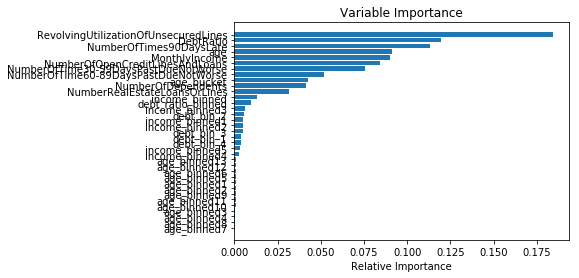

In [893]:
from sklearn.ensemble import RandomForestClassifier
features = np.array(features)

clf = RandomForestClassifier()
clf.fit(x_train[features], y_train)

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

In [894]:
best_features = features[sorted_idx][::-1]
best_features

array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'age', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'age_bucket',
       'NumberOfDependents', 'NumberRealEstateLoansOrLines',
       'income_binned', 'debt_ratio_binned', 'income_binned3',
       'debt_bin_2', 'income_binned1', 'income_binned2', 'debt_bin_3',
       'debt_bin_1', 'debt_bin_4', 'income_binned5', 'income_binned4',
       'age_binned13', 'age_binned12', 'age_binned6', 'age_binned5',
       'age_binned1', 'age_binned2', 'age_binned9', 'age_binned11',
       'age_binned10', 'age_binned3', 'age_binned4', 'age_binned8',
       'age_binned7'], dtype='<U36')

In [895]:
features = best_features[:6]
data[features].describe()

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,NumberOfTimes90DaysLate,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
count,41016.00000,41016.000000,41016.000000,41016.000000,33042.000000,41016.000000
mean,6.37587,331.458137,0.419592,51.683489,6045.789026,8.403477
std,221.61895,1296.109695,5.190382,14.746880,3663.717398,5.207324
min,0.00000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,0.03431,0.176375,0.000000,41.000000,3333.000000,5.000000
50%,0.18973,0.369736,0.000000,51.000000,5250.000000,8.000000
75%,0.66716,0.866471,0.000000,62.000000,8055.750000,11.000000
max,22000.00000,106885.000000,98.000000,109.000000,15000.000000,56.000000


## 4. Create and Evaluate the Classifier

In [898]:
x_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,age_binned4,age_binned5,age_binned6,age_binned7,age_binned8,age_binned9,age_binned10,age_binned11,age_binned12,age_binned13
39054,0.296726,53,0,0.352313,10484.0,8,0,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
21298,0.000000,26,0,0.279305,1782.0,5,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12839,0.855088,62,0,0.580120,3500.0,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
32002,0.072021,65,1,0.312028,6408.0,16,0,3,0,0.0,...,0,0,0,0,0,0,0,0,0,0
36228,0.156948,55,0,0.262015,2163.0,5,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [899]:
for x_set in feat:
    x_set = x_set.filter(items=['age_binned3',
 'age_binned9',
 'age_binned10',
 'age_binned11',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age_binned12',
 'RevolvingUtilizationOfUnsecuredLines',
 'age_binned7',
 'age_binned6',
 'debt_bin_2',
 'income_binned3',
 'age_binned5',
 'age_binned8',
 'age_bucket',
 'NumberRealEstateLoansOrLines',
 'income_binned2',
 'income_binned4',
 'NumberOfDependents',
 'debt_bin_4',
 'income_binned5',
 'age_binned2',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'debt_bin_3',
 'NumberOfOpenCreditLinesAndLoans',
 'age_binned13',
 'age_binned4'])


In [900]:
len( list(x_train))
    

35

## 4b. Evaluate Classifier

In [901]:
depths = [2, 3, 5, 7, 9,]
criterion = ['gini', 'entropy']
max_features = [2,3,5,6]
splitter = ['best', 'random']
min_sample_l = [3,5,7,9]
min_sample_spl= [3,5,7,9]
max_leaf_nodes = [3,5,6]
results = []
for d in depths:
    for criteria in criterion:
        for feature in max_features:
            for split in splitter:
                for min_leave in min_sample_l:
                    for min_split in min_sample_spl:
                        for max_leaf in max_leaf_nodes:
                            dec_tree = DecisionTreeClassifier(max_depth= d, criterion = criteria, splitter = split,
                            max_features = feature, min_samples_leaf = min_leave,  min_samples_split = min_split, 
                                                              max_leaf_nodes = max_leaf )
                            dec_tree.fit(x_train[features], y_train)
                            train_pred = dec_tree.predict(x_train[features])
                            test_pred = dec_tree.predict(x_test[features])
                            # evaluate accuracy
                            train_acc = accuracy(train_pred, y_train)
                            test_acc = accuracy(test_pred, y_test)
                            result = d, criteria, feature, split, min_leave, min_split, max_leaf ,train_acc, test_acc
                            results.append(result)        
evaluation_df = pd.DataFrame(results,columns = ['Max_depth', 'Criteria', 'Number_Features', 'Split', \
                                                'Min_Sample_leave','Min_Sample_split','Max_Leadf_Nodes', 'Train_Acc', 'Test_Acc'])
evaluation_df.sort_values(by=['Test_Acc'], ascending = False)

,Max_depth,Criteria,Number_Features,Split,Min_Sample_leave,Min_Sample_split,Max_Leadf_Nodes,Train_Acc,Test_Acc
2452,7,gini,3,random,3,5,5,0.867650,0.874566
970,3,gini,5,best,3,9,5,0.868138,0.874383
2522,7,gini,5,best,7,3,6,0.868138,0.874383
892,3,gini,3,best,7,5,5,0.868138,0.874383
962,3,gini,5,best,3,3,6,0.868138,0.874383
967,3,gini,5,best,3,7,5,0.868138,0.874383
988,3,gini,5,best,7,5,5,0.868138,0.874383
995,3,gini,5,best,7,9,6,0.868138,0.874383
3571,9,entropy,3,best,5,7,5,0.868138,0.874383
2521,7,gini,5,best,7,3,5,0.868138,0.874383


## Fitting the best model

In [902]:
dec_tree = DecisionTreeClassifier(max_depth= 9, criterion = 'gini', splitter = 'best',\
                            max_features = 3, min_samples_leaf = 7,  min_samples_split = 5, \
                                                              max_leaf_nodes = 5 )
dec_tree.fit(x_train[features], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=3, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=7,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [903]:
train_pred = dec_tree.predict(x_train[features])
test_pred = dec_tree.predict(x_test[features])
train_acc = accuracy(train_pred, y_train) 
test_acc = accuracy(test_pred, y_test)

In [904]:
print(train_acc, test_acc) #why this number is different? Ask Horace

0.8661058962168312 0.8734686414335344


In [905]:
confusion_matrix(y_test, dec_tree.predict(x_test[features]))


array([[13276,   535],
       [ 1541,  1055]])

In [906]:
print (classification_report(y_test, dec_tree.predict(x_test[features]) , labels=[0, 1]))


             precision    recall  f1-score   support

          0       0.90      0.96      0.93     13811
          1       0.66      0.41      0.50      2596

avg / total       0.86      0.87      0.86     16407



In [907]:
confusion = pd.crosstab(y_test, dec_tree.predict(x_test[features]), rownames=["Actual"], \
                        colnames=["Predicted"])
#,normalize = 'index'

In [908]:
#confusion.rename(columns={0:'Y',1:'N'})

In [909]:
confusion

Predicted,0,1
Actual,,
0,13276,535
1,1541,1055


In [910]:
len(x_test)

16407